In [286]:
import pandas as pd
import numpy as np
import math
%pylab inline
import matplotlib.pyplot as plt
from collections import defaultdict
from __future__ import division
import pprint as pp


survey_answers = pd.read_csv('survey_results.csv')
candidate_answers = pd.read_csv('candidate_results.csv')
real_results = pd.read_csv('real_results.csv')

Populating the interactive namespace from numpy and matplotlib


In [280]:
survey_answers_question_group = survey_answers.groupby(['question_id'])
survey_length_list = []
for key in survey_answers_question_group.groups:
    survey_length_list.append(len(survey_answers_question_groups[key]))

## Answers Received
Total Surveys Taken: 1213  
Questions on Survey: 36  

Below is a plot showing how many answers each question got from the total survey count

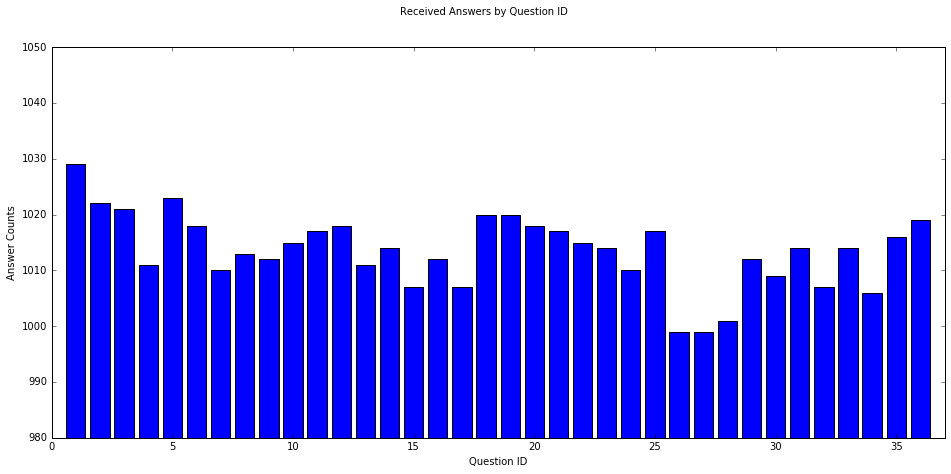

In [281]:
###Plot answer counts
fig, ax = plt.subplots(figsize=(16,7))
width = .8;
tickLocations = np.arange(1,37)
rectLocations = tickLocations - (width/2.0)
ax.bar(rectLocations, survey_length_list, width)
###Aesthetics
ax.set_xlim(0,37)
ax.set_ylim((980,1050))
ax.set_xlabel('Question ID')
ax.set_ylabel('Answer Counts')
fig.suptitle('Received Answers by Question ID')

In [282]:
### This produces a dictionary of dictionaries of lists., the top level is a candidate name, within each name is
### a dictionary containing the ID of each question (from 1 to 36). For each question there is a list containing
### the answer_id for the candidate, and the associated intensity, in format [ANSWER, INTENSITY]
candidate_answers_dictionary = defaultdict(dict)
candidate_answers_question_group = candidate_answers.groupby(['question_id'])

for key, item in candidate_answers_question_group:
    question_number = candidate_answers_question_group.get_group(key)
    
    for row, item in question_number.iterrows():
        candidate_name = item['candidate_name']
        question_id = item['question_id']
        answer_id = item['answer_id']
        intensity = item['intensity']
        
        candidate_answers_dictionary[candidate_name][question_id] =  [answer_id, intensity]

In [283]:
### This reads in each question one at a time (first loop) then runs through each survey answer to the question
### (second loop), and runs through each candidate's answer to the question (third loop) and checks if answers
### are equivalent. If they are, match_count is incremented to reflect the total matches, and weighted_count is
### calculated for each question. The total weighted count is then calculated to reflect the final results.

match_count = defaultdict(int)
total_weighted_count = defaultdict(list)

for key, item in survey_answers_question_group:
    question_number =  survey_answers_question_group.get_group(key)
    question_number = question_number.drop('survey_response_id',1)
    question_number = question_number.drop('id',1)
    weighted_count = defaultdict(list)
    
    for row, item in question_number.iterrows():
        question_id = item['question_id']
        answer_id = item['answer_id']
        voter_intensity = item['intensity']
        
        for entry in candidate_answers_dictionary:
            if candidate_answers_dictionary[entry][question_id][0] == answer_id:
                match_count[entry] += 1
                weighted_count[entry].append((voter_intensity +
                                              candidate_answers_dictionary[entry][question_id][1])/10)
                
    for entry in weighted_count:
         total_weighted_count[entry].append(sum(weighted_count[entry])/len(weighted_count[entry]))

final_results = defaultdict(int)
for entry in total_weighted_count:
    total_weighted_count[entry] =  sum(total_weighted_count[entry]) / len(total_weighted_count[entry])
    final_results[entry] = match_count[entry] * total_weighted_count[entry]

match_count = dict(match_count)
final_results = dict(final_results)

## Okelection results
Match count - considering each answer match as one 'vote', this is the unweighted count of all the votes for each candidate.

Final results - multiplying the match count "votes" for each candidate and multiplying it by the weighting factor extracted from total_weighted_count we see the weighted results.

Total match count (unweighted)
{'Andria P. McClellan': 20559,
 'Andy A. Protogyrou': 18593,
 'Angelia Williams Graves': 16864,
 'Barclay C. Winn': 17749,
 'G.W. "Billy" Cook, Jr.': 19319,
 'Harry David Candela': 18689,
 'Kendrick J. Turner': 18657,
 'Kenneth Cooper Alexander': 17766,
 'Robert J. McCabe': 19308,
 'Warren A. Stewart': 17843}


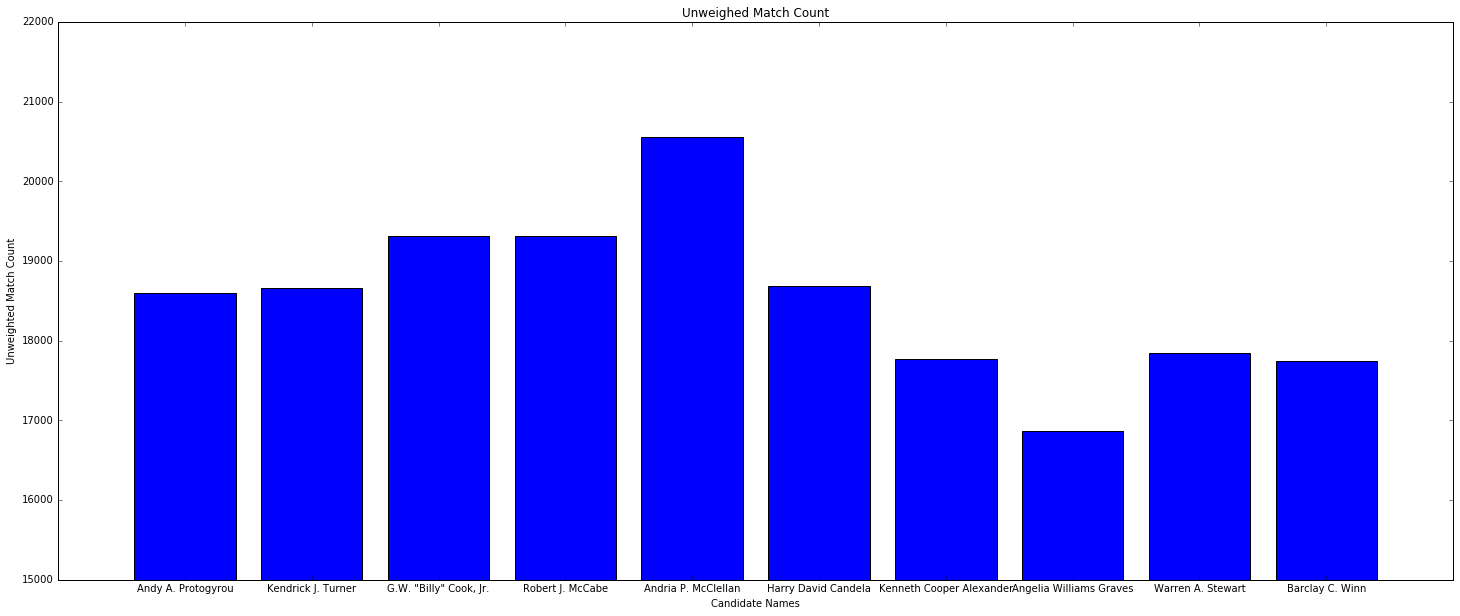

In [284]:
print 'Total match count (unweighted)'
pp.pprint(match_count)

fig, ax = plt.subplots(figsize=(25,10))


ax.bar(range(len(match_count)), match_count.values(), align = 'center')
plt.xticks(range(len(match_count)), match_count.keys())
ax.set_ylim(15000,22000)
ax.set_xlim(-1,10)
ax.set_xlabel('Candidate Names')
ax.set_ylabel('Unweighted Match Count')
ax.set_title('Unweighed Match Count')
plt.show()




Final results (weighted)
{'Andria P. McClellan': 16979.770482653952,
 'Andy A. Protogyrou': 15583.90157554942,
 'Angelia Williams Graves': 11858.97433768954,
 'Barclay C. Winn': 14255.910471203722,
 'G.W. "Billy" Cook, Jr.': 14481.369448223853,
 'Harry David Candela': 16297.337834404052,
 'Kendrick J. Turner': 16134.754992087743,
 'Kenneth Cooper Alexander': 14063.764667993388,
 'Robert J. McCabe': 16488.013238382468,
 'Warren A. Stewart': 12520.446547458292}


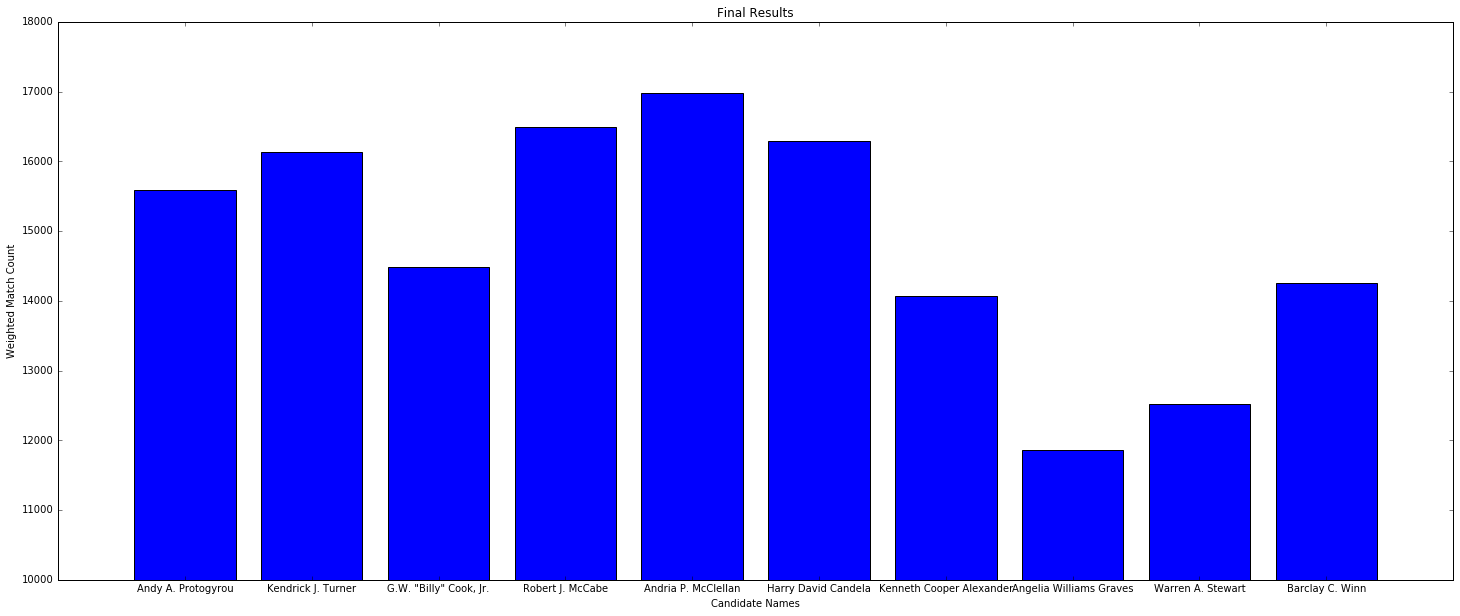

In [285]:
print 'Final results (weighted)'
pp.pprint(final_results)

fig, ax = plt.subplots(figsize=(25,10))
ax.bar(range(len(final_results)), final_results.values(), align = 'center')
plt.xticks(range(len(final_results)), final_results.keys())
ax.set_ylim(10000,18000)
ax.set_xlim(-1,10)
ax.set_xlabel('Candidate Names')
ax.set_ylabel('Weighted Match Count')
ax.set_title('Final Results')
plt.show()

## Compare to real results


Results of actual election:
{'Andria P. McClellan': 8054,
 'Andy A. Protogyrou': 8022,
 'Angelia Williams Graves': 7673,
 'Barclay C. Winn': 7090,
 'G.W. "Billy" Cook, Jr.': 4217,
 'Harry David Candela': 611,
 'Kendrick J. Turner': 618,
 'Kenneth Cooper Alexander': 16397,
 'Robert J. McCabe': 7276,
 'Warren A. Stewart': 2427}


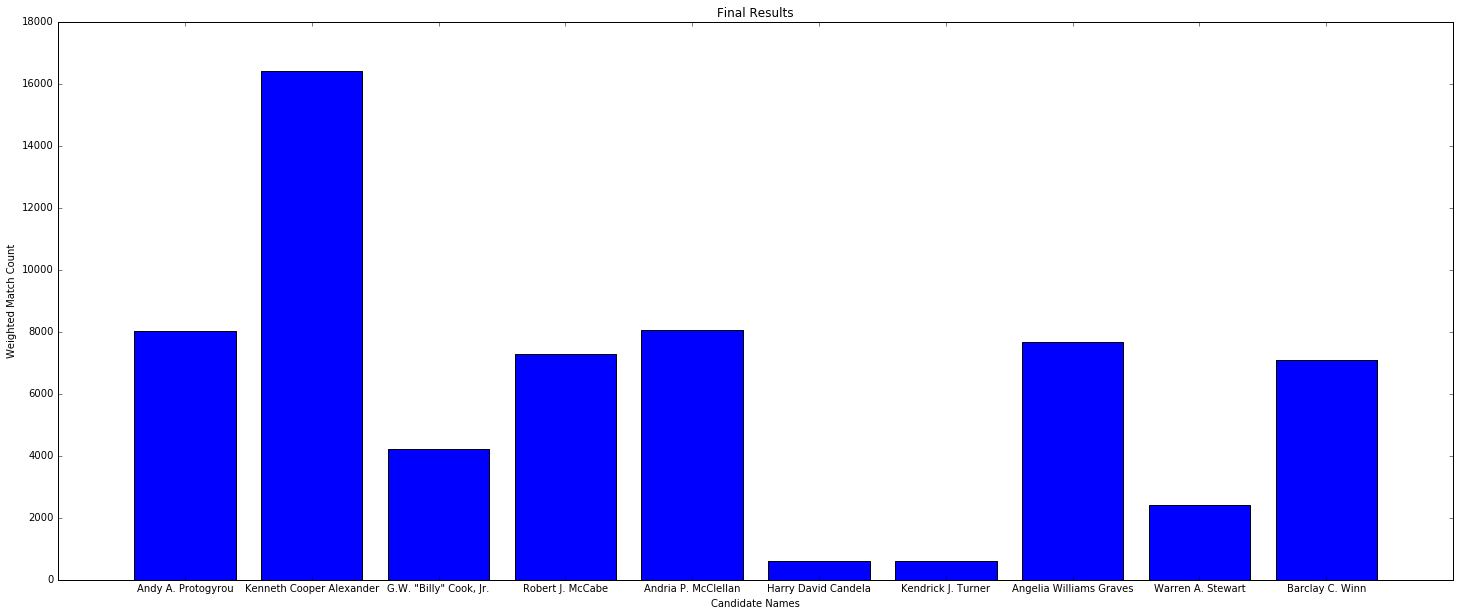

In [315]:
results_dict = defaultdict()
for entry,item in real_results.iterrows():
    results_dict[item[0]] = item[1]
results_dict = dict(results_dict)

print 'Results of actual election:'
pp.pprint(results_dict)

fig, ax = plt.subplots(figsize=(25,10))
ax.bar(range(len(results_dict)), results_dict.values(), align = 'center')
plt.xticks(range(len(results_dict)), results_dict.keys())
ax.set_xlim(-1,10)
ax.set_xlabel('Candidate Names')
ax.set_ylabel('Real Votes')
ax.set_title('Real Results')
plt.show()
